In [1]:
import requests
import time
import seaborn as sns

import pandas as pd

import numpy as np
import xgboost
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_text, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [11]:
sdg_2019 = pd.read_csv('../Data/2019_sdg.csv')

In [12]:
gdp_2019 = pd.read_csv('../Data/gdp_2019.csv')

In [18]:
sdg_2019.head(3)

,msa,Region,maincity,msa_NAME,score_sdgi,rank_sdgIndex,score_sdg1,score_sdg2,score_sdg3,score_sdg4,...,sdg13v1_GHGcapita,sdg13v2_climateaware,sdg13v3_adaptationplan,sdg15v1_parkarea,sdg15v2_naturalpark,sdg15v4_landreleasechange,sdg16v1_incarcerationrate,sdg16v2_prisonadmission,sdg16v5_firearmdeath,sdg16v6_nonwhitegov
0,41860,4,San Francisco,"San Francisco-Oakland-Hayward, CA",70,1,84,68,86,61,...,10.0,82,1,20.0,53.0,7.0,455.0,55.0,4,6.0
1,41940,4,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",68,2,87,74,90,65,...,7.0,79,0,14.0,87.0,4.0,594.0,71.0,2,0.0
2,47900,3,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",67,3,84,56,74,65,...,9.0,77,1,22.0,59.0,19.0,348.0,1.0,5,11.0


In [16]:
sdg_2019.rename({'msa': 'msa_NAME','Cbsa': 'msa'}, axis=1,inplace=True)

In [17]:
sdg_2019.head(3)

,msa,Region,maincity,msa_NAME,score_sdgi,rank_sdgIndex,score_sdg1,score_sdg2,score_sdg3,score_sdg4,...,sdg13v1_GHGcapita,sdg13v2_climateaware,sdg13v3_adaptationplan,sdg15v1_parkarea,sdg15v2_naturalpark,sdg15v4_landreleasechange,sdg16v1_incarcerationrate,sdg16v2_prisonadmission,sdg16v5_firearmdeath,sdg16v6_nonwhitegov
0,41860,4,San Francisco,"San Francisco-Oakland-Hayward, CA",70,1,84,68,86,61,...,10.0,82,1,20.0,53.0,7.0,455.0,55.0,4,6.0
1,41940,4,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",68,2,87,74,90,65,...,7.0,79,0,14.0,87.0,4.0,594.0,71.0,2,0.0
2,47900,3,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",67,3,84,56,74,65,...,9.0,77,1,22.0,59.0,19.0,348.0,1.0,5,11.0


In [19]:
gdp_2019.head(3)

,msa,2019
0,10180,6812477
1,10420,33086775
2,10500,5699287


In [ ]:
gdp_2019.rename({'msa': 'NAME'}, axis=1,inplace=True)

In [20]:
sdg_gdp_2019 = gdp_2019.merge(sdg_2019, on='msa',how='left', indicator=True)

In [26]:
sdg_gdp_2019

,msa,2019,Region,maincity,msa_NAME,score_sdgi,rank_sdgIndex,score_sdg1,score_sdg2,score_sdg3,...,sdg13v2_climateaware,sdg13v3_adaptationplan,sdg15v1_parkarea,sdg15v2_naturalpark,sdg15v4_landreleasechange,sdg16v1_incarcerationrate,sdg16v2_prisonadmission,sdg16v5_firearmdeath,sdg16v6_nonwhitegov,_merge
0,10180,6812477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,10420,33086775,2.0,Akron,"Akron, OH",51.0,32.0,52.0,23,39.0,...,70.0,0.0,NaN,NaN,-4.0,168.0,268.0,6.0,4.0,both
2,10500,5699287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,10540,4692052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,10580,56461199,1.0,Albany,"Albany-Schenectady-Troy, NY",59.0,11.0,60.0,39,62.0,...,73.0,1.0,NaN,NaN,-20.0,802.0,230.0,2.0,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,49420,11038340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
380,49620,19163414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
381,49660,19794756,2.0,Youngstown,"Youngstown-Warren-Boardman, OH-PA",38.0,100.0,22.0,23,28.0,...,69.0,0.0,NaN,NaN,24.0,398.0,256.0,7.0,NaN,both
382,49700,7108720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


### SDG 2019 vs. GDP 2019

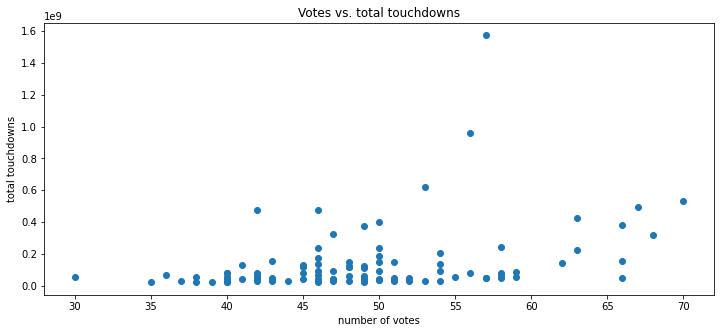

In [22]:
# Size
plt.figure(figsize = (12, 5))

plt.scatter(sdg_gdp_2019['score_sdgi'], sdg_gdp_2019['2019'])

# Create a descriptive title
plt.title('Votes vs. total touchdowns')
# Add axis labels
plt.xlabel('number of votes')
plt.ylabel('total touchdowns');

### SDG and DGP correlation

In [24]:
sdg_gdp_corr = sdg_gdp_2019.corr()['2019']

In [25]:
test = sdg_gdp_corr.sort_values(ascending=False)
test[0:15]

2019                            1.000000
n_sdg11v2_sustainabletransit    0.688142
sdg11v2_sustainabletransit      0.685831
score_sdg13                     0.446997
sdg3v8_lifeExpectancy           0.403286
n_sdg3v8_lifeExpectancy         0.400196
sdg4v3_tertiaryed               0.394867
n_sdg2v3_foodaccess             0.394360
n_sdg4v3_tertiaryed             0.393305
score_sdg1                      0.388587
score_sdg3                      0.386720
n_sdg13v2_climateaware          0.383181
sdg13v2_climateaware            0.381445
sdg13v3_adaptationplan          0.379060
n_sdg13v3_adaptationplan        0.379060
Name: 2019, dtype: float64

In [24]:
sdg_gdp_corr = sdg_gdp_2019.corr()['2019']

In [25]:
test = sdg_gdp_corr.sort_values(ascending=False)
test[0:15]

2019                            1.000000
n_sdg11v2_sustainabletransit    0.688142
sdg11v2_sustainabletransit      0.685831
score_sdg13                     0.446997
sdg3v8_lifeExpectancy           0.403286
n_sdg3v8_lifeExpectancy         0.400196
sdg4v3_tertiaryed               0.394867
n_sdg2v3_foodaccess             0.394360
n_sdg4v3_tertiaryed             0.393305
score_sdg1                      0.388587
score_sdg3                      0.386720
n_sdg13v2_climateaware          0.383181
sdg13v2_climateaware            0.381445
sdg13v3_adaptationplan          0.379060
n_sdg13v3_adaptationplan        0.379060
Name: 2019, dtype: float64

In [48]:
sdg_gdp_census_2019.columns

Index(['Unnamed: 0', 'msa', 'NAME', 'S1701_C01_001E', 'S2201_C01_001E',
       'S0101_C01_024E', 'S0101_C01_022E', 'S0101_C01_028E', 'S2301_C01_001E',
       'B01001_001E', 'B25001_001E', 'B25002_001E', 'B25005_001E',
       'B25048_001E', 'B25052_001E', 'B25007_012E', 'B25041_003E',
       'B25041_004E', 'B25041_005E', 'B25041_006E', 'B25041_007E',
       'B25019_001E', 'B06011_001E', 'B06009_002E', 'B06009_003E',
       'B06009_004E', 'B06009_005E', 'B06009_006E', 'gdp_2019', 'score_sdgi',
       '_merge'],
      dtype='object')

### Merge SDG, GDP, and Census data to model

In [ ]:
sdg_2019 = pd.read_csv('../Data/2019_sdg.csv')

In [32]:
sdgscore_2019 = sdg_2019[['msa','score_sdgi']]

In [28]:
gdp_census_2019 = pd.read_csv('../Data/2019_data.csv')

In [33]:
sdg_gdp_census_2019 = gdp_census_2019.merge(sdgscore_2019, on='msa',how='left', indicator=True)

In [35]:
sdg_gdp_census_2019.columns

Index(['Unnamed: 0', 'msa', 'NAME', 'S1701_C01_001E', 'S2201_C01_001E',
       'S0101_C01_024E', 'S0101_C01_022E', 'S0101_C01_028E', 'S2301_C01_001E',
       'B01001_001E', 'B25001_001E', 'B25002_001E', 'B25005_001E',
       'B25048_001E', 'B25052_001E', 'B25007_012E', 'B25041_003E',
       'B25041_004E', 'B25041_005E', 'B25041_006E', 'B25041_007E',
       'B25019_001E', 'B06011_001E', 'B06009_002E', 'B06009_003E',
       'B06009_004E', 'B06009_005E', 'B06009_006E', 'gdp_2019', 'score_sdgi',
       '_merge'],
      dtype='object')

In [49]:
sdg_gdp_census_2019.describe()

,Unnamed: 0,msa,S1701_C01_001E,S2201_C01_001E,S0101_C01_024E,S0101_C01_022E,S0101_C01_028E,S2301_C01_001E,B01001_001E,B25001_001E,...,B25041_007E,B25019_001E,B06011_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B06009_006E,gdp_2019,score_sdgi
count,104.000000,104.000000,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,...,104.000000,1.040000e+02,104.000000,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,104.000000
mean,196.865385,30484.038462,2.086748e+06,7.831059e+05,8.635752e+05,4.773034e+05,4.595767e+05,1.705190e+06,2.128501e+06,8.636866e+05,...,43891.980769,4.963729e+06,33737.048077,1.636592e+05,3.567492e+05,3.997684e+05,3.293914e+05,2.107250e+05,1.355651e+08,48.855769
std,113.424887,11716.567435,2.643003e+06,9.651414e+05,1.100047e+06,5.937900e+05,5.719878e+05,2.162940e+06,2.686053e+06,1.053249e+06,...,58468.387614,5.689323e+06,5230.643970,2.613519e+05,4.321103e+05,4.460309e+05,4.507904e+05,3.109020e+05,2.080773e+08,7.767768
min,2.000000,10420.000000,3.498350e+05,1.308510e+05,1.469920e+05,7.806200e+04,7.396400e+04,2.991570e+05,3.674300e+05,1.451330e+05,...,4453.000000,8.749830e+05,19896.000000,1.441400e+04,5.790600e+04,5.201300e+04,4.332300e+04,1.726000e+04,1.928523e+07,30.000000
25%,87.750000,19520.000000,7.292748e+05,2.723908e+05,2.990365e+05,1.705528e+05,1.642238e+05,5.849002e+05,7.454640e+05,3.028758e+05,...,11471.500000,1.776356e+06,30589.500000,5.069275e+04,1.406248e+05,1.534100e+05,9.562575e+04,5.483275e+04,3.423593e+07,43.000000
50%,211.000000,32140.000000,1.023622e+06,4.013735e+05,4.195925e+05,2.466515e+05,2.486835e+05,8.519020e+05,1.058462e+06,4.424715e+05,...,22312.000000,2.630780e+06,32580.500000,7.731450e+04,1.881350e+05,2.142115e+05,1.548685e+05,1.001245e+05,5.736244e+07,48.000000
75%,282.250000,40200.000000,2.276270e+06,8.741308e+05,9.785308e+05,5.217758e+05,5.198870e+05,1.901910e+06,2.329132e+06,9.543965e+05,...,47837.250000,5.828832e+06,36354.250000,1.495098e+05,4.111482e+05,4.953890e+05,3.735008e+05,2.115572e+05,1.360668e+08,53.000000
max,389.000000,49660.000000,1.887713e+07,7.102817e+06,7.670576e+06,4.096809e+06,4.334637e+06,1.558355e+07,1.921618e+07,7.797416e+06,...,398407.000000,4.053735e+07,50985.000000,1.710664e+06,3.316837e+06,2.830504e+06,3.266624e+06,2.375867e+06,1.573857e+09,70.000000


In [ ]:
### analysis to determine why only 104 are in both (population)

In [36]:
sdg_gdp_census_2019['_merge'].value_counts()

left_only     280
both          104
right_only      0
Name: _merge, dtype: int64

In [37]:
left_only =  sdg_gdp_census_2019['_merge'] == 'left_only'
sdg_gdp_census_2019[left_only][0:10]

,Unnamed: 0,msa,NAME,S1701_C01_001E,S2201_C01_001E,S0101_C01_024E,S0101_C01_022E,S0101_C01_028E,S2301_C01_001E,B01001_001E,...,B25019_001E,B06011_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B06009_006E,gdp_2019,score_sdgi,_merge
0,0,10180,"Abilene, TX Metro Area",158400,61750,75856,41350,35659,134883,171795,...,392680,26622.0,10996.0,35113.0,36815.0,17779.0,8521.0,6812477.0,NaN,left_only
2,3,10500,"Albany, GA Metro Area",141957,54128,57570,34411,34601,116771,147384,...,377460,24115.0,16748.0,28351.0,32968.0,9354.0,9765.0,5699287.0,NaN,left_only
3,4,10540,"Albany-Lebanon, OR Metro Area",127316,49407,49229,28785,32990,105687,129749,...,286255,30608.0,11121.0,24269.0,38274.0,11093.0,5969.0,4692052.0,NaN,left_only
6,7,10780,"Alexandria, LA Metro Area",145255,55591,59061,36600,34140,120165,152037,...,380488,26713.0,14846.0,39044.0,30060.0,12427.0,5391.0,5575697.0,NaN,left_only
8,9,11020,"Altoona, PA Metro Area",118813,52497,42341,24620,33796,100095,121829,...,356621,29501.0,7394.0,38805.0,21457.0,13087.0,7258.0,5647210.0,NaN,left_only
9,10,11100,"Amarillo, TX Metro Area",259257,98606,111823,69527,54856,207705,269447,...,616843,29453.0,23557.0,48494.0,57416.0,29445.0,14153.0,12698215.0,NaN,left_only
10,11,11180,"Ames, IA Metro Area",111389,50253,64444,20939,23141,104687,123351,...,318830,30115.0,2391.0,15263.0,23368.0,19355.0,13617.0,5837188.0,NaN,left_only
11,12,11260,"Anchorage, AK Metro Area",387004,137934,168714,97784,70920,308427,396317,...,859751,36760.0,13591.0,71591.0,89367.0,54360.0,31977.0,23244564.0,NaN,left_only
12,13,11460,"Ann Arbor, MI Metro Area",347058,141680,176401,67499,74214,307754,367601,...,925915,36442.0,10904.0,33141.0,58757.0,60153.0,69970.0,22430838.0,NaN,left_only
13,14,11500,"Anniston-Oxford, AL Metro Area",110599,44636,43889,24474,28966,92308,113605,...,324409,24513.0,12195.0,27277.0,24355.0,9082.0,6175.0,4050073.0,NaN,left_only


In [38]:
both =  sdg_gdp_census_2019['_merge'] == 'both'
sdg_gdp_census_2019[both][0:10]

,Unnamed: 0,msa,NAME,S1701_C01_001E,S2201_C01_001E,S0101_C01_024E,S0101_C01_022E,S0101_C01_028E,S2301_C01_001E,B01001_001E,...,B25019_001E,B06011_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B06009_006E,gdp_2019,score_sdgi,_merge
1,2,10420,"Akron, OH Metro Area",685097,285647,269984,141888,178763,579116,703479,...,1956297,30842.0,37410.0,157491.0,138951.0,98114.0,57275.0,33086775.0,51.0,both
4,5,10580,"Albany-Schenectady-Troy, NY Metro Area",850456,362502,347515,170336,221555,731319,880381,...,2457566,37442.0,46007.0,155441.0,170380.0,134620.0,108143.0,56461199.0,59.0,both
5,6,10740,"Albuquerque, NM Metro Area",902139,354359,364806,197754,221224,739261,914480,...,2230145,29861.0,68124.0,159577.0,196709.0,117647.0,93545.0,39250733.0,50.0,both
7,8,10900,"Allentown-Bethlehem-Easton, PA-NJ Metro Area",818268,322301,314463,175237,218169,689845,844052,...,2202810,32273.0,54074.0,209837.0,152582.0,113677.0,62143.0,41912704.0,49.0,both
16,18,12940,"Baton Rouge, LA Metro Area",831474,305441,360213,199685,180306,679750,854884,...,2102885,30721.0,69092.0,183416.0,156158.0,103377.0,51851.0,53347706.0,30.0,both
19,21,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",5915478,2189294,2494224,1450990,1090846,4733233,6018744,...,15246399,35603.0,403834.0,939218.0,1073316.0,995590.0,608746.0,371826639.0,49.0,both
22,24,12260,"Augusta-Richmond County, GA-SC Metro Area",592891,211969,241812,140807,138924,485716,610648,...,1625268,27569.0,44445.0,126515.0,128391.0,72878.0,40213.0,25427997.0,40.0,both
23,25,12420,"Austin-Round Rock-Georgetown, TX Metro Area",2179655,818084,1038905,504773,362821,1779784,2227083,...,4776313,40056.0,144966.0,290121.0,376661.0,445551.0,250408.0,143075741.0,62.0,both
24,26,12540,"Bakersfield, CA Metro Area",872223,272888,388291,259120,147531,665025,900202,...,1600849,25283.0,130580.0,155083.0,171997.0,64784.0,29512.0,51416782.0,38.0,both
25,27,12580,"Baltimore-Columbia-Towson, MD Metro Area",2732343,1062901,1106900,609673,638619,2258125,2800053,...,7588664,41340.0,163020.0,476832.0,491359.0,448825.0,366794.0,188615454.0,50.0,both


In [ ]:
B01001_001E = population

In [41]:
pop_test = sdg_gdp_census_2019.sort_values(by='B01001_001E', ascending=False)

In [44]:
pop_test[0:105]

,Unnamed: 0,msa,NAME,S1701_C01_001E,S2201_C01_001E,S0101_C01_024E,S0101_C01_022E,S0101_C01_028E,S2301_C01_001E,B01001_001E,...,B25019_001E,B06011_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B06009_006E,gdp_2019,score_sdgi,_merge
206,210,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",18877126,7102817,7670576,4096809,4334637,15583548,19216182,...,40537346,40271.0,1710664.0,3316837.0,2830504.0,3266624.0,2375867.0,1.573857e+09,57.0,both
354,361,31080,"Los Angeles-Long Beach-Anaheim, CA Metro Area",13010414,4372678,5583340,2834225,2686886,10702867,13214799,...,22962290,32473.0,1708635.0,1829694.0,2371370.0,2119864.0,1132529.0,9.602497e+08,56.0,both
56,58,16980,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",9299008,3539174,3844853,2129677,2017587,7577566,9457867,...,22551742,36716.0,687662.0,1554216.0,1696881.0,1535426.0,1009032.0,6.186165e+08,53.0,both
90,92,19100,"Dallas-Fort Worth-Arlington, TX Metro Area",7479506,2635017,3226795,1945726,1279162,5853713,7573136,...,16538771,35749.0,661761.0,1131846.0,1350447.0,1155466.0,632672.0,4.723343e+08,46.0,both
159,162,26420,"Houston-The Woodlands-Sugar Land, TX Metro Area",6981579,2436438,3003088,1861784,1201910,5407415,7066140,...,15491803,34661.0,702982.0,1075744.0,1270252.0,971507.0,551225.0,4.721043e+08,42.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,277,42540,"Scranton--Wilkes-Barre, PA Metro Area",532934,230210,201267,111077,151827,455680,553885,...,1649373,29337.0,34362.0,155544.0,109845.0,59086.0,37864.0,2.649916e+07,44.0,both
190,194,33700,"Modesto, CA Metro Area",546896,174698,227702,147773,103549,419828,550660,...,1014343,31226.0,68799.0,106940.0,113257.0,43323.0,17260.0,2.371571e+07,49.0,both
338,345,29620,"Lansing-East Lansing, MI Metro Area",527390,215854,235191,112205,125031,451792,550391,...,1420381,31108.0,21673.0,94598.0,121628.0,71931.0,50910.0,2.383740e+07,NaN,left_only
337,344,29540,"Lancaster, PA Metro Area",532688,204701,205388,127872,136672,431887,545724,...,1346783,32236.0,52866.0,128767.0,83551.0,68160.0,36279.0,2.688144e+07,48.0,both


In [45]:
sdg_gdp_census_2019 = sdg_gdp_census_2019[both]

In [47]:
sdg_gdp_census_2019.to_csv('../Data/sdg_gdp_census_2019.csv')